# Mean-Variance Portfolio Optimisation

Typically, when we download stock data, the information is formatted as asset values at the end of a period (daily, monthly, quarterly). When we calculate the efficient frontiers, we need to structure the data as the percent returned over each period.

Before we can calculate the expected return of a portfolio, we need to find the expected return of each asset.

When calculating the efficient frontier, we need to find the average expected return for each asset. Because we are using DataFrames, we can calculate the average expected return using the `mean()` method.

In [9]:
import pandas as pd
import numpy as np

path='stock_data.csv'
stock_data = pd.read_csv(path)
assets = list(stock_data.columns[1:])
quarterly_returns = stock_data[assets].pct_change()

expected_returns_avg = quarterly_returns.mean()

print("Average Expected Returns for Stocks\n")
print(expected_returns_avg)

Average Expected Returns for Stocks

Delta        0.062093
Jet Blue     0.052361
Chevron      0.010323
Exxon       -0.002444
Adobe        0.053780
Honeywell    0.028439
dtype: float64


## Weight of an Asset

The weight of an asset is the fraction of the money invested in the asset (the numerator of the fraction below), divided by the total amount of money in the portfolio (the denominator of the fraction below):

$$w_n = {c_n \over total}$$

The sum of the weights of all assets will equal to one.

To calculate the expected return of a portfolio, you must find the weighted sum of the return for each individual asset:

$$ER = \sum_{i = 1}^n w_iR_i$$

## Covariance Matrix

The measure of an asset’s unpredictability is called its risk. We can estimate the risk of an asset by calculating its variance. If an asset’s return is very unpredictable, then its variance will be large and the investment considered risky. If an asset’s variance is small, the asset’s returns are predictable and the asset is not as risky.

When we quantify the risk of a portfolio, in addition to the variance of each asset, we must calculate the covariance between each asset and every other asset. If two assets have a positive covariance, then they respond similarly to market forces. Assets with a negative covariance will not.

Assets can have a positive covariance, negative covariance, or no covariance:

- **Positive covariance** — when one asset increases in value, the other usually increases in value. The covariance value will be greater than 0.
- **Negative covariance** — when one asset increases in value, the other usually decreases in value. The covariance value will be less than 0.
- **Uncorrelated assets** — when there is no quantifiable pattern to the response of two assets. The covariance value is equal to 0.


To make computations more manageable, we store variances and covariances of assets in a covariance matrix. A covariance matrix is symmetric, with the variance of each asset on the diagonal. For example, the covariance matrix of a three-asset portfolio would look like:

$$\left[
\begin{array}{ll}
  \sigma_1 & \sigma_{1, 2} & \sigma_{1, 3} \\ 
  \sigma_{1, 2} & \sigma_2 & \sigma_{2, 3} \\ 
  \sigma_{1, 3} & \sigma_{2, 3} & \sigma_3 \\ 
\end{array} 
\right]$$


In [8]:
import pandas as pd
import numpy as np

path='stock_data.csv'
stock_data = pd.read_csv(path)
selected=list(stock_data.columns[1:])

returns_quarterly = stock_data[selected].pct_change()
expected_returns = returns_quarterly.mean()

print("Stock Data:\n")
print(stock_data.head(5))

returns_cov = returns_quarterly.cov()
print("\nCovariance Matrix:\n")
print(returns_cov.round(4).head(5))

Stock Data:

         Date  Delta  Jet Blue  Chevron  Exxon  Adobe  Honeywell
0  2007-12-31  14.64      5.94    94.37  94.39  42.58      60.89
1  2008-03-31   8.65      5.45    84.95  85.69  35.69      55.72
2  2008-06-30   5.42      3.58    98.30  86.81  39.63      49.26
3  2008-09-30   7.50      4.70    78.85  75.62  36.72      41.55
4  2008-12-31  10.97      6.80    72.90  78.42  20.85      32.61

Covariance Matrix:

           Delta  Jet Blue  Chevron   Exxon   Adobe  Honeywell
Delta     0.0578    0.0379  -0.0004  0.0021  0.0042     0.0081
Jet Blue  0.0379    0.0450  -0.0018  0.0024 -0.0015     0.0055
Chevron  -0.0004   -0.0018   0.0110  0.0070  0.0046     0.0070
Exxon     0.0021    0.0024   0.0070  0.0072  0.0031     0.0062
Adobe     0.0042   -0.0015   0.0046  0.0031  0.0225     0.0113


## Efficient Frontier



In [12]:
import pandas as pd
import numpy as np
import random

def return_portfolios(expected_returns, cov_matrix):
  np.random.seed(1)
  port_returns = []
  port_volatility = []
  stock_weights = []
    
  selected = (expected_returns.axes)[0]
    
  num_assets = len(selected) 
  num_portfolios = 5000
    
  for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, expected_returns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)
    
    portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility}
    
  for counter,symbol in enumerate(selected):
    portfolio[symbol +' Weight'] = [Weight[counter] for Weight in stock_weights]
    
  df = pd.DataFrame(portfolio)
    
  column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]
    
  df = df[column_order]
   
  return df

"""
Below, we read in stock data from stock_data, and calculate the expected quarterly returns and covariance matrix for the assets
"""
stock_prices = pd.read_csv('stock_data.csv')
selected=list(stock_prices.columns[1:])
returns_quarterly = stock_prices[selected].pct_change()
expected_returns = returns_quarterly.mean()
cov_quarterly = returns_quarterly.cov()

"""
The return_portfolios function returns a DataFrame with 5,000 portfolios
"""
random_portfolios = return_portfolios(expected_returns, cov_quarterly) 
print(random_portfolios.head().round(4))

   Returns  Volatility  Delta Weight  Jet Blue Weight  Chevron Weight   
0   0.0437      0.1477        0.2484           0.4290          0.0001  \
1   0.0290      0.0893        0.0724           0.1344          0.1543   
2   0.0347      0.1054        0.0742           0.3186          0.0099   
3   0.0198      0.0835        0.0451           0.0636          0.2572   
4   0.0463      0.1432        0.2978           0.3040          0.0289   

   Exxon Weight  Adobe Weight  Honeywell Weight  
0        0.1801        0.0874            0.0550  
1        0.2095        0.1630            0.2664  
2        0.2432        0.1514            0.2027  
3        0.3110        0.1007            0.2224  
4        0.0133        0.0577            0.2984  


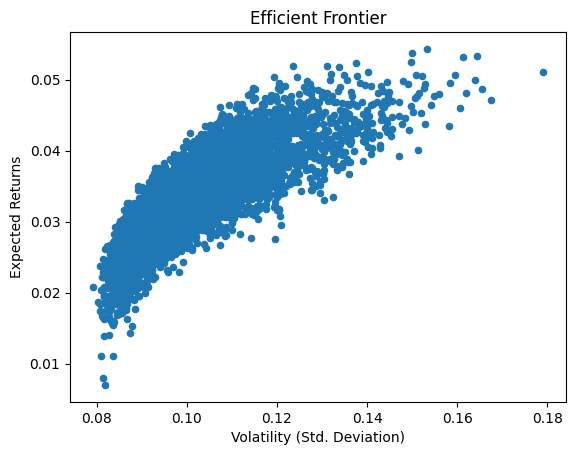

In [13]:
import matplotlib.pyplot as plt

random_portfolios.plot.scatter(x='Volatility', y='Returns')
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

     pcost       dcost       gap    pres   dres
 0: -3.6910e-02 -1.0606e+00  1e+00  2e-16  3e+00
 1: -3.7860e-02 -7.0546e-02  3e-02  5e-17  9e-02
 2: -5.6522e-02 -6.1228e-02  5e-03  3e-16  3e-17
 3: -5.8910e-02 -5.9232e-02  3e-04  3e-17  2e-17
 4: -5.9195e-02 -5.9202e-02  7e-06  2e-16  3e-17
 5: -5.9202e-02 -5.9202e-02  7e-08  1e-16  3e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.6835e-02 -1.0604e+00  1e+00  0e+00  3e+00
 1: -3.7780e-02 -7.0358e-02  3e-02  3e-17  9e-02
 2: -5.6232e-02 -6.0905e-02  5e-03  4e-16  3e-17
 3: -5.8543e-02 -5.8888e-02  3e-04  3e-17  1e-17
 4: -5.8838e-02 -5.8849e-02  1e-05  1e-16  3e-17
 5: -5.8849e-02 -5.8849e-02  1e-07  2e-16  2e-17
 6: -5.8849e-02 -5.8849e-02  1e-09  2e-16  2e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.6751e-02 -1.0602e+00  1e+00  0e+00  3e+00
 1: -3.7691e-02 -7.0148e-02  3e-02  1e-16  9e-02
 2: -5.5918e-02 -6.0547e-02  5e-03  1e-16  3e-17
 3: -5.8147e-02 -5.8507e

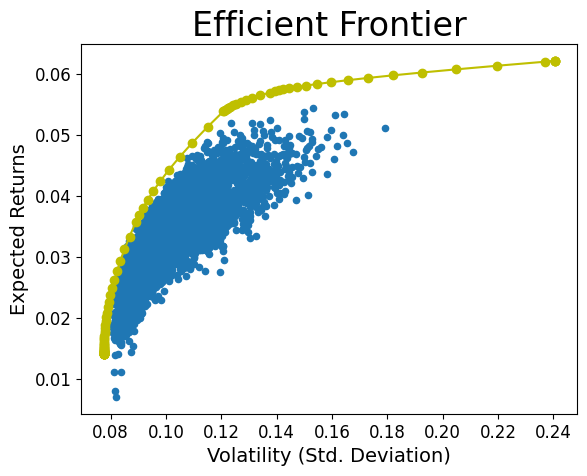

In [19]:
import cvxopt as opt
from cvxopt import blas, solvers

def optimal_portfolio(returns):
    n = returns.shape[1]
    returns = np.transpose(returns.values)

    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]

    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))

    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x']
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

weights, returns, risks = optimal_portfolio(returns_quarterly[1:])


random_portfolios.plot.scatter(x='Volatility', y='Returns', fontsize=12)
try:
	plt.plot(risks, returns, 'y-o')
except:
  pass
plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Efficient Frontier', fontsize=24)
plt.show()

     pcost       dcost       gap    pres   dres
 0: -4.4204e-02 -1.0743e+00  1e+00  1e-16  3e+00
 1: -4.5321e-02 -8.4257e-02  4e-02  1e-16  1e-01
 2: -6.9792e-02 -7.9290e-02  9e-03  2e-16  2e-03
 3: -7.2269e-02 -7.2819e-02  6e-04  1e-16  8e-05
 4: -7.2744e-02 -7.2750e-02  6e-06  1e-16  7e-07
 5: -7.2749e-02 -7.2749e-02  6e-08  1e-16  7e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.4123e-02 -1.0742e+00  1e+00  0e+00  3e+00
 1: -4.5235e-02 -8.4128e-02  4e-02  9e-17  1e-01
 2: -6.9492e-02 -7.9001e-02  1e-02  4e-16  1e-03
 3: -7.1935e-02 -7.2508e-02  6e-04  1e-16  7e-05
 4: -7.2430e-02 -7.2437e-02  7e-06  7e-18  6e-07
 5: -7.2436e-02 -7.2436e-02  7e-08  1e-16  6e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.4032e-02 -1.0740e+00  1e+00  2e-16  3e+00
 1: -4.5139e-02 -8.3983e-02  4e-02  1e-16  1e-01
 2: -6.9161e-02 -7.8676e-02  1e-02  2e-16  1e-03
 3: -7.1562e-02 -7.2160e-02  6e-04  2e-17  6e-05
 4: -7.2077e-02 -7.2085e

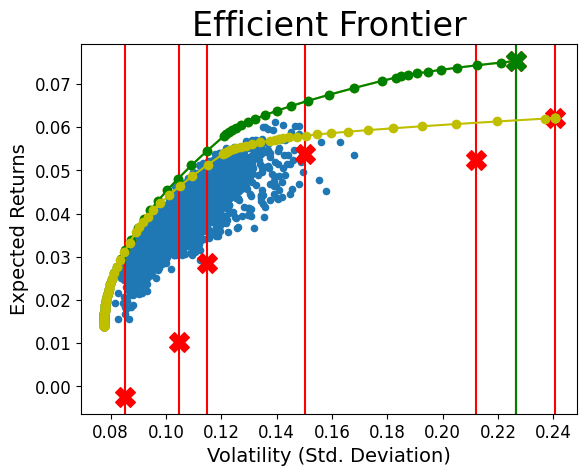

In [21]:
path='stock_data_nvidia.csv'

stock_data = pd.read_csv(path)
selected=list(stock_data.columns[1:])

returns_quarterly = stock_data[selected].pct_change()
expected_returns = returns_quarterly.mean()
cov_quarterly = returns_quarterly.cov()

single_asset_std=np.sqrt(np.diagonal(cov_quarterly))
df = return_portfolios(expected_returns, cov_quarterly) 
weights, returns, risks = optimal_portfolio(returns_quarterly[1:])

df.plot.scatter(x='Volatility', y='Returns', fontsize=12)
plt.plot(risks, returns, 'y-o')
plt.scatter(single_asset_std,expected_returns,marker='X',color='red',s=200)
for xc in single_asset_std:
    plt.axvline(x=xc, color='red')

if 'nvidia' in path:
  plt.axvline(single_asset_std[-1], color='green')
  plt.scatter(single_asset_std[-1],expected_returns[-1],marker='X',color='green',s=200)
  original_EF=np.genfromtxt("stock_risks_returns.csv", delimiter=',')
  plt.plot(risks, returns, 'g-o')
  plt.plot(original_EF[:,0],original_EF[:,1], 'y-o')
plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Efficient Frontier', fontsize=24)
plt.show()

Nvidia is a high-risk, high-return asset. Despite Nvidia’s risk, it improved the efficient frontier by increasing the expected return at most standard deviations. This is evident by the shift of the efficient frontier up and to the left.

In this example, a high-risk, high-return asset increased the expected return of portfolios on the efficient frontier. This is because the new asset had a larger expected return than any other asset.

To decrease the risk of portfolios on an efficient frontier, you should add assets that are uncorrelated to assets in your portfolio.

Unlike with expected return, the risk of an individual asset does not indicate whether it will affect the risk of the overall portfolio. An uncorrelated asset increases the diversity of your portfolio, which protects you from a downturn that may affect a subset of your assets.

     pcost       dcost       gap    pres   dres
 0: -5.2736e-02 -1.0895e+00  1e+00  0e+00  3e+00
 1: -5.4123e-02 -9.9420e-02  5e-02  8e-17  1e-01
 2: -8.4292e-02 -9.8461e-02  1e-02  2e-16  3e-03
 3: -8.6311e-02 -8.6983e-02  7e-04  2e-16  1e-04
 4: -8.6851e-02 -8.6860e-02  8e-06  4e-18  1e-06
 5: -8.6858e-02 -8.6858e-02  8e-08  2e-16  1e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.2656e-02 -1.0894e+00  1e+00  2e-16  3e+00
 1: -5.4039e-02 -9.9305e-02  5e-02  5e-17  1e-01
 2: -8.3878e-02 -9.8035e-02  1e-02  2e-16  2e-03
 3: -8.5863e-02 -8.6559e-02  7e-04  2e-16  9e-05
 4: -8.6423e-02 -8.6432e-02  1e-05  4e-18  9e-07
 5: -8.6431e-02 -8.6431e-02  1e-07  2e-16  9e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.2567e-02 -1.0893e+00  1e+00  0e+00  3e+00
 1: -5.3945e-02 -9.9177e-02  5e-02  2e-16  1e-01
 2: -8.3424e-02 -9.7557e-02  1e-02  1e-16  1e-03
 3: -8.5363e-02 -8.6084e-02  7e-04  2e-16  5e-05
 4: -8.5941e-02 -8.5953e

KeyError: 'risks'

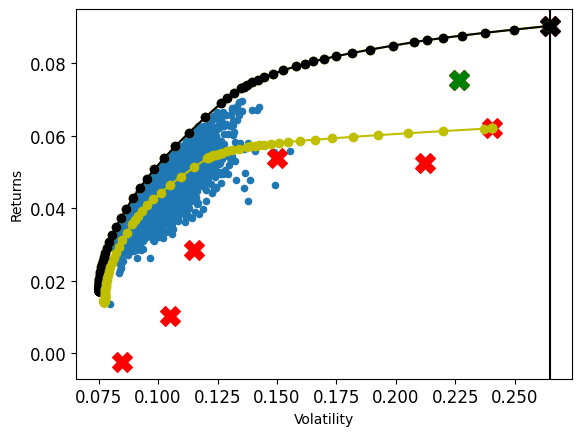

In [24]:
path='stocks_nvidia_dexcom.csv'

stock_data = pd.read_csv(path)
selected=list(stock_data.columns[1:])

returns_quarterly = stock_data[selected].pct_change()
expected_returns = returns_quarterly.mean()
cov_quarterly = returns_quarterly.cov()

single_asset_std=np.sqrt(np.diagonal(cov_quarterly))
df = return_portfolios(expected_returns, cov_quarterly) 
weights, returns, risks = optimal_portfolio(returns_quarterly[1:])

df.plot.scatter(x='Volatility', y='Returns', fontsize=12)
plt.plot(risks, returns, 'y-o')
plt.scatter(single_asset_std,expected_returns,marker='X',color='red',s=200)


if 'dexcom' in path:
  plt.axvline(single_asset_std[-1], color='black')
  plt.scatter(single_asset_std[-1],expected_returns[-1],marker='X',color='black',s=200)
  plt.scatter(single_asset_std[-2],expected_returns[-2],marker='X',color='green',s=200)
  original_EF=pd.read_csv('risks_returns_original.csv')
  nvidia_EF=pd.read_csv('risks_returns_nvidia.csv')
  plt.plot(risks, returns, 'k-o')
  plt.plot(original_EF['risks'],original_EF['returns'], 'y-o')
  plt.plot(nvidia_EF['risks'],nvidia_EF['returns'], 'g-o')
elif 'nvidia' in path:
  plt.axvline(single_asset_std[-1], color='green')
  plt.scatter(single_asset_std[-1],expected_returns[-1],marker='X',color='green',s=200)
  original_EF=pd.read_csv('risks_returns_original.csv')
  plt.plot(risks, returns, 'g-o')
  plt.plot(original_EF['risks'],original_EF['returns'], 'y-o')
  
plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Efficient Frontier', fontsize=24)
plt.show()